In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

## 6.2.6 - Get City Weather Data¶

### Import Dependencies, and Initialize an Empty List and Counters

In [6]:
# Import Dependencies datetime module from datetime library
from datetime import datetime

# Create an empty list to hold the weather data

city_data = []

# print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=04adbef39455200ca16d18e7aeb02de8


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

### Handle API Request Errors with try-except Blocks

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 12 | emerald
Processing Record 3 of Set 12 | upernavik
Processing Record 4 of Set 12 | cayenne
Processing Record 5 of Set 12 | ushuaia
Processing Record 6 of Set 12 | tasiilaq
Processing Record 7 of Set 12 | sinaloa
Processing Record 8 of Set 12 | souillac
Processing Record 9 of Set 12 | rudozem
Processing Record 10 of Set 12 | aleksandrov gay
Processing Record 11 of Set 12 | bluff
Processing Record 12 of Set 12 | kaeo
Processing Record 13 of Set 12 | sao joao da barra
Processing Record 14 of Set 12 | haines junction
Processing Record 15 of Set 12 | mar del plata
Processing Record 16 of Set 12 | mataura
Processing Record 17 of Set 12 | vanimo
Processing Record 18 of Set 12 | amderma
City not found. Skipping...
Processing Record 19 of Set 12 | arman
Processing Record 20 of Set 12 | nouadhibou
Processing Record 21 of Set 12 | gornopravdinsk
Processing Record 22 of Set 12 | attawapiskat
City n

Processing Record 35 of Set 15 | abu dhabi
Processing Record 36 of Set 15 | antofagasta
Processing Record 37 of Set 15 | misratah
Processing Record 38 of Set 15 | morton
Processing Record 39 of Set 15 | pisco
Processing Record 40 of Set 15 | wagar
Processing Record 41 of Set 15 | thompson
Processing Record 42 of Set 15 | illoqqortoormiut
City not found. Skipping...
Processing Record 43 of Set 15 | chicama
Processing Record 44 of Set 15 | morant bay
Processing Record 45 of Set 15 | byron bay
Processing Record 46 of Set 15 | tuktoyaktuk
Processing Record 47 of Set 15 | bela
Processing Record 48 of Set 15 | saint stephen
Processing Record 49 of Set 15 | karamea
City not found. Skipping...
Processing Record 50 of Set 15 | wenling
Processing Record 1 of Set 16 | saleaula
City not found. Skipping...
Processing Record 2 of Set 16 | gat
Processing Record 3 of Set 16 | laguna
Processing Record 4 of Set 16 | anito
Processing Record 5 of Set 16 | jackson
Processing Record 6 of Set 16 | santiago d

Processing Record 21 of Set 19 | maragogi
Processing Record 22 of Set 19 | kalmunai
Processing Record 23 of Set 19 | tura
Processing Record 24 of Set 19 | kalaleh
Processing Record 25 of Set 19 | sinegorye
Processing Record 26 of Set 19 | nicoya
Processing Record 27 of Set 19 | dubbo
Processing Record 28 of Set 19 | vila franca do campo
Processing Record 29 of Set 19 | san patricio
Processing Record 30 of Set 19 | miles city
Processing Record 31 of Set 19 | avera
Processing Record 32 of Set 19 | ambovombe
Processing Record 33 of Set 19 | sao filipe
Processing Record 34 of Set 19 | jiuquan
Processing Record 35 of Set 19 | kidal
Processing Record 36 of Set 19 | nabire
Processing Record 37 of Set 19 | srandakan
Processing Record 38 of Set 19 | chingirlau
Processing Record 39 of Set 19 | olga
Processing Record 40 of Set 19 | mungwi
Processing Record 41 of Set 19 | lebedyn
Processing Record 42 of Set 19 | pucallpa
Processing Record 43 of Set 19 | pinheiro
Processing Record 44 of Set 19 | oc

Processing Record 9 of Set 23 | alexandria
Processing Record 10 of Set 23 | obera
Processing Record 11 of Set 23 | ust-tsilma
Processing Record 12 of Set 23 | zyryanka
Processing Record 13 of Set 23 | yefimovskiy
City not found. Skipping...
Processing Record 14 of Set 23 | zhigansk
Processing Record 15 of Set 23 | umm ruwabah
City not found. Skipping...
Processing Record 16 of Set 23 | duku
Processing Record 17 of Set 23 | axim
Processing Record 18 of Set 23 | mana
Processing Record 19 of Set 23 | huarmey
Processing Record 20 of Set 23 | provideniya
Processing Record 21 of Set 23 | kadipaten
Processing Record 22 of Set 23 | mao
Processing Record 23 of Set 23 | tam ky
Processing Record 24 of Set 23 | rockport
Processing Record 25 of Set 23 | puerto madryn
Processing Record 26 of Set 23 | kushmurun
Processing Record 27 of Set 23 | chagoda
Processing Record 28 of Set 23 | touros
Processing Record 29 of Set 23 | gangotri
City not found. Skipping...
Processing Record 30 of Set 23 | mayo
Pro

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Emerald,-23.53,148.17,66.20,88,0,3.36,AU,2020-10-30 19:24:19
1,Upernavik,72.79,-56.15,20.88,95,95,3.31,GL,2020-10-30 19:24:19
2,Cayenne,4.93,-52.33,89.60,62,45,14.99,GF,2020-10-30 19:24:19
3,Ushuaia,-54.80,-68.30,48.20,70,75,23.04,AR,2020-10-30 19:23:08
4,Tasiilaq,65.61,-37.64,33.80,86,75,4.70,GL,2020-10-30 19:24:19
5,Sinaloa,25.00,-107.50,93.00,37,75,3.36,MX,2020-10-30 19:24:19
6,Souillac,-20.52,57.52,69.80,52,75,20.80,MU,2020-10-30 19:24:20
7,Rudozem,41.48,24.85,53.60,54,0,19.46,BG,2020-10-30 19:24:20
8,Aleksandrov Gay,50.15,48.57,48.24,51,100,7.38,RU,2020-10-30 19:24:20
9,Bluff,-46.60,168.33,55.00,97,100,5.99,NZ,2020-10-30 19:24:20


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [13]:
# Reorder DataFrame Columns
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Emerald,AU,2020-10-30 19:24:19,-23.53,148.17,66.20,88,0,3.36
1,Upernavik,GL,2020-10-30 19:24:19,72.79,-56.15,20.88,95,95,3.31
2,Cayenne,GF,2020-10-30 19:24:19,4.93,-52.33,89.60,62,45,14.99
3,Ushuaia,AR,2020-10-30 19:23:08,-54.80,-68.30,48.20,70,75,23.04
4,Tasiilaq,GL,2020-10-30 19:24:19,65.61,-37.64,33.80,86,75,4.70
5,Sinaloa,MX,2020-10-30 19:24:19,25.00,-107.50,93.00,37,75,3.36
6,Souillac,MU,2020-10-30 19:24:20,-20.52,57.52,69.80,52,75,20.80
7,Rudozem,BG,2020-10-30 19:24:20,41.48,24.85,53.60,54,0,19.46
8,Aleksandrov Gay,RU,2020-10-30 19:24:20,50.15,48.57,48.24,51,100,7.38
9,Bluff,NZ,2020-10-30 19:24:20,-46.60,168.33,55.00,97,100,5.99


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Get Data for Plotting

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604086063.822981

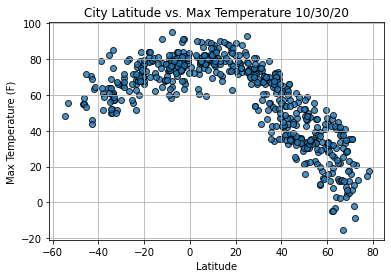

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

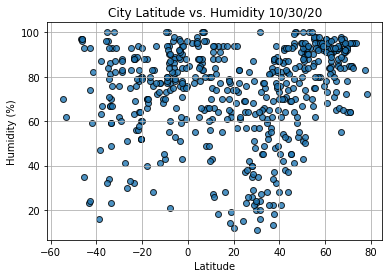

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

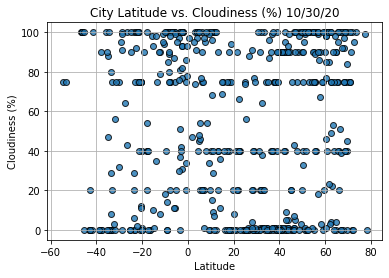

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

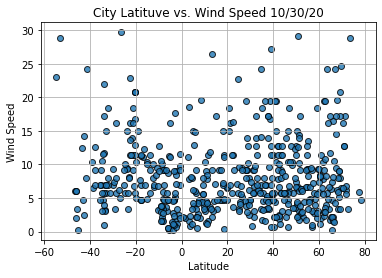

In [20]:
# Build the scatter plots for latitude vs wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latituve vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()

### Create a Linear Regression Function

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### Create the Hemisphere DataFrame

In [22]:
index13 = city_data_df.loc[13]
index13

City                Mar Del Plata
Country                        AR
Date          2020-10-30 19:22:08
Lat                           -38
Lng                        -57.56
Max Temp                     60.8
Humidity                       63
Cloudiness                      0
Wind Speed                   9.17
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Upernavik,GL,2020-10-30 19:24:19,72.79,-56.15,20.88,95,95,3.31
2,Cayenne,GF,2020-10-30 19:24:19,4.93,-52.33,89.60,62,45,14.99
4,Tasiilaq,GL,2020-10-30 19:24:19,65.61,-37.64,33.80,86,75,4.70
5,Sinaloa,MX,2020-10-30 19:24:19,25.00,-107.50,93.00,37,75,3.36
7,Rudozem,BG,2020-10-30 19:24:20,41.48,24.85,53.60,54,0,19.46
...,...,...,...,...,...,...,...,...,...
535,Troitsko-Pechorsk,RU,2020-10-30 19:22:14,62.71,56.20,31.93,96,100,10.76
536,Charlottesville,US,2020-10-30 19:22:54,38.03,-78.48,63.00,48,75,9.60
537,Shonguy,RU,2020-10-30 19:26:07,68.75,33.15,28.40,92,40,8.95
538,Alakurtti,RU,2020-10-30 19:26:07,66.97,30.35,25.21,97,0,4.21


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

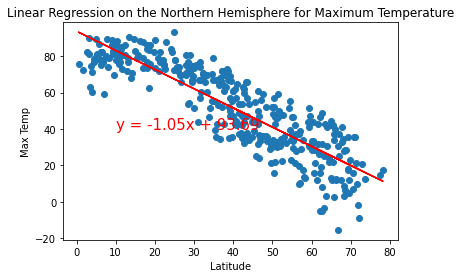

In [25]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

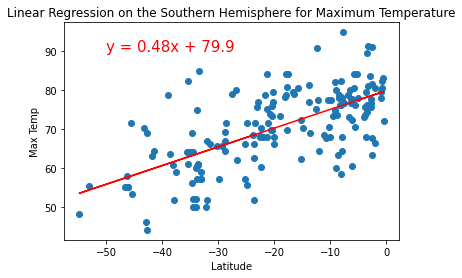

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

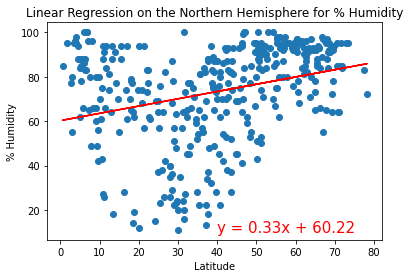

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

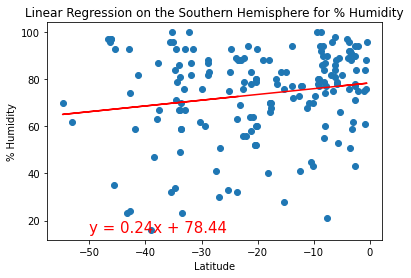

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

### 6.4.4 Skill Drill 

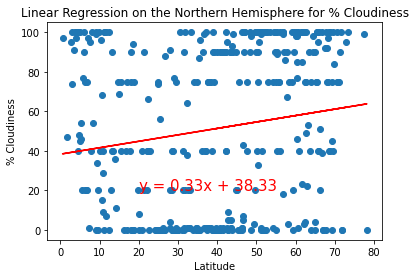

In [29]:
# Linear regression on Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (20,20))

#### Perform Linear Regression on % Cloudiness for the Southern Hemisphere

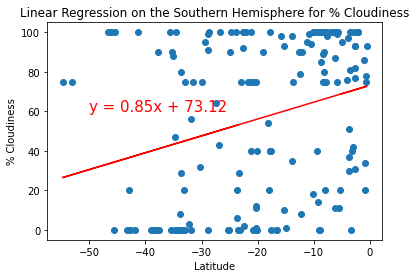

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

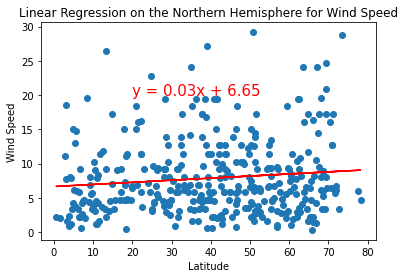

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(20,20))

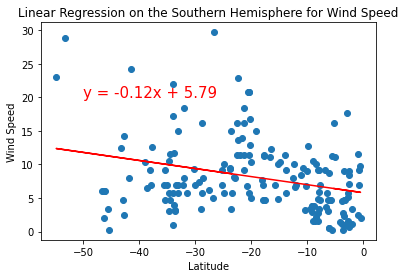

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))